<h1><center>Labor Economics</center></h1>

### Exam
- project work:
    - by yourself or in a group
    - presentation at the end of the term
    - brief written summary of your work, 3-5 pages

### Exercise class
- biweekly
- working on data
- small exercises
- working on your own project

### Tools
- Stata
<br>Feel free to use any code you like for your own analysis (R, SAS, Stata, Python, ...). However, since we had to decide
on a tool to be used in this class, I am going to work with Stata.

### Data
- Current Population Survey (U.S.)
- CPS-Supplements

## Stata

<b>getting started</b>
-   https://ell.stackexchange.com/questions/91623/difference-between-by-and-via <br>List of helpful links for beggining to work with stata <br>

- https://www.stata.com/features/ <br>List of features in Stata <br>

- vast amount of literature and tutorials available online <br>




## Current Population Survey

- <a href="https://www.census.gov/programs-surveys/cps.html">cps homepage</a>
- started in 1940, open data, free access
- monthly survey of ~ 60.000 U.S. households
- participants: over 15 years old, not part of the armed forces, not working in institutions such as prisons, long-term care hospitals and nursing homes
- conducted by United States Census Bureau, commissioned by Bureau of Labor Statistics

- questionnaire covers demographic and economic (especially labor force) topics
- expanded by regular (at least yearly) supplements, such as
    - Social and Economic Supplement
    - Computer and Internet Use
    - Tobacco Use
    - Civic Engagement
    - ...
    
    (complete list of supplements: <a href = https://www.census.gov/programs-surveys/cps/about/supplemental-surveys.html>LINK</a>)

- process of data collection (monthly data):
    - households are interviewed in the week of the 19th of a month
    - revisited for three following months
    - revisited again in the next year and the very same four months
    
<center><b>4-8-4 pattern</b></center>

## IPUMS

- problem: CPS solely assigns unique identifiers to households, not to individuals
    - i.e. the same household is revisited seven times - regardless of which family or individual answers the door
- longitudinal research on an individual level complicated, but not impossible

- linking items via matching making use of variables such as household identifier, line number within household and demographic characteristics (e.g. sex, age, race) <br>
    - <i>Drew, J.A., Flood, S. and Warren, J.R. (2014) "Making full use of the longitudinal design of the Current Population Survey:
    Methods for linking records across 16 months", Journal of Economic and Social Measurement, 39, pp. 121-144. <br> DOI 10.3233/JEM-140388</i>
- accordingly prepared microdata available in the <b>Integrated Public Use Microdata Series (IPUMS-CPS)</b> <a href="https://cps.ipums.org/cps/">LINK</a>

## <span style="color:orange">Homework</span>

Visit https://cps.ipums.org/cps/ and create an account. Register with any valid e-mail adress, preferably your uni-mail adress. Select all the variables and samples potentially relevant to your project.
Use the desciprtion of the variables to decide which to include in your extract. Try to minimise the number of variables in your extract.
Submit your request. It may take some time for your extract to be prepared and ready for download. The download link will be provided to you via e-mail once the data is processed.


Hint #1: If you already stumbled upon research papers dealing with questions similar to your project and working with CPS-data, you may include the author's choice of variables in your set as well.

Hint #2: take your time. This task is not trivial. Your work depends on the data at hand. Carefully chosen variables suited for answering a particular question facilitate your research.

- We confine our analysis to the years from 2000 onwards
- Choose your variables wisely: The number of variables inflates the size of the data set. E.g. 80 variables across monthly data between 2000 and 2019 constitute more than 7 gb of data
- adding supplements you receive data sets as large as 50 gb and more

- the bigger your extract,
    - the more time it takes the IPUMS server to process your request (from several hours to possibly several days)
    - the more time it takes you to download it
    - the more time and processing power is required to modify and analyse the data
- Good practice: Select cases to reduce the size, drop redundant variables (e.g. recodes), do not include every supplement (since for most individuals in the monthly survey the values are blank anyway)


## <span style="color:orange">Homework</span>

Validate the CPSID linkages following the hints in the description of the variable. (<a href="https://cps.ipums.org/cps-action/variables/cpsidp#description_section">LINK</a> to description)

It is recommended to verify the linkages by checking the consistency of the variables AGE, RACE and SEX.
For a linkage to be valid, a CPSID should have a unique gender and race. Though age is not a static variable, it should be in a certain range for the survey lifetime of an individual, i.e. between $AGE_{i, t=1} = AGE_{i, t=0} + d$ with $d \in [0, 2]$.

Hint: This is not an easy task to do. You might come up with an own approach outside of Stata, you might be able to write proper code in Stata.
Furthermore, you have to consider whether you want to check the linkages for two consecutive months only or if you want to check the whole survey lifetime of a participant.

Here is my approach for validating the linkages between two consecutive months:

In [29]:
* loading data
cd "C:\Users\Hannes\Documents"
use "session01.dta", clear

* Creating lead variables
bysort cpsidp (mish): gen lead_mish = mish[_n+1]
bysort cpsidp (mish): gen lead_age = age[_n+1] if lead_mish - mish == 1
bysort cpsidp (mish): gen lead_race = race[_n+1] if lead_mish - mish == 1
bysort cpsidp (mish): gen lead_sex = sex[_n+1] if lead_mish - mish == 1


C:\Users\Hannes\Documents


(1,773,756 missing values generated)

(1,993,760 missing values generated)

(1,993,760 missing values generated)

(1,993,760 missing values generated)


In [30]:
* Creating lead variables
bysort cpsidp (mish): gen lag_mish = mish[_n-1]
bysort cpsidp (mish): gen lag_age = age[_n-1] if mish - lag_mish == 1
bysort cpsidp (mish): gen lag_race = race[_n-1] if mish - lag_mish == 1
bysort cpsidp (mish): gen lag_sex = sex[_n-1] if mish - lag_mish == 1


(1,773,756 missing values generated)

(1,993,760 missing values generated)

(1,993,760 missing values generated)

(1,993,760 missing values generated)


In [31]:
* validation
gen linked_f = .m
replace linked_f = 1 if lead_mish - mish == 1 & lead_race == race & lead_sex == sex & ((mish == 4 & lead_age - age >= 0 & lead_age - age <= 2) | (mish ~= 4 & lead_age - age >= 0 & lead_age - age <= 1))

gen linked_b = .m
replace linked_b = 1 if mish - lag_mish == 1 & race == lag_race & sex == lag_sex & ((mish == 5 & age - lag_age >= 0 & age - lag_age <= 2) | (mish ~= 5 & age - lag_age >= 0 & age - lag_age <= 1))


(11,354,337 missing values generated)

(9,277,986 real changes made)

(11,354,337 missing values generated)

(9,277,986 real changes made)


In [32]:
* flag for linked backwards and/or forwards
gen linked = linked_f == 1 | linked_b == 1

In [33]:
tab linked


     linked |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |    197,314        1.74        1.74
          1 | 11,157,023       98.26      100.00
------------+-----------------------------------
      Total | 11,354,337      100.00


What makes the linking invalid for those 197,5 k observations?

In [34]:
gen age_diff = lead_age - age
tab age_diff if linked == 0 & !inrange(age_diff, 0, 2)


(1,993,760 missing values generated)


   age_diff |      Freq.     Percent        Cum.
------------+-----------------------------------
        -52 |          1        0.00        0.00
        -51 |          2        0.01        0.01
        -50 |          4        0.01        0.02
        -49 |          2        0.01        0.03
        -48 |          3        0.01        0.03
        -47 |          4        0.01        0.05
        -46 |          6        0.02        0.06
        -45 |          9        0.03        0.09
        -44 |         17        0.05        0.14
        -43 |         12        0.03        0.17
        -42 |         17        0.05        0.22
        -41 |         20        0.06        0.27
        -40 |         22        0.06        0.34
        -39 |         30        0.09        0.42
        -38 |         38        0.11        0.53
        -37 |         28        0.08        0.61
        -36 |         43        0.12        0.73
        -35 |         49     

In [35]:
numlabel, add
tab sex lead_sex if linked == 0 & sex ~= lead_sex




           |       lead_sex
       sex |         1          2 |     Total
-----------+----------------------+----------
   1. male |         0      1,059 |     1,059 
 2. female |     1,328          0 |     1,328 
-----------+----------------------+----------
     Total |     1,328      1,059 |     2,387 


In [36]:
tab race lead_race if linked == 0 & race ~= lead_race


                      |                  lead_race
                 race |       100        200        300        650 |     Total
----------------------+--------------------------------------------+----------
           100. white |         0        688        132         47 |     1,573 
     200. black/negro |       643          0         17          8 |       789 
300. american indian/ |       151         22          0          0 |       226 
650. asian or pacific |        82          9          1          0 |       476 
      651. asian only |       355         63          8          0 |       471 
652. hawaiian/pacific |        43         11          2          0 |        91 
     801. white-black |        45         22          2          0 |        79 
802. white-american i |        59          4          4          0 |        74 
     803. white-asian |        16          0          0          0 |        24 
804. white-hawaiian/p |         2          1          0          0 |  

300. american indian/ |         0          0          0          1 |       226 
650. asian or pacific |         0          1          1          0 |       476 
      651. asian only |         0          0          1          0 |       471 
652. hawaiian/pacific |         0          0          0          0 |        91 
     801. white-black |         0          0          1          0 |        79 
802. white-american i |         0          0          0          0 |        74 
     803. white-asian |         0          1          0          0 |        24 
804. white-hawaiian/p |         0          0          2          0 |         7 
805. black-american i |         0          0          0          0 |         8 
     806. black-asian |         0          0          0          0 |         9 
808. american indian- |         0          0          0          0 |         1 
809. asian-hawaiian/p |         0          0          2          0 |         8 
810. white-black-amer |         0       

In [37]:
by cpsidp: egen maxmish = max(mish)
tab maxmish




    maxmish |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      8,880        0.08        0.08
          2 |     28,653        0.25        0.33
          3 |     62,278        0.55        0.88
          4 |    700,541        6.17        7.05
          5 |    123,755        1.09        8.14
          6 |    170,636        1.50        9.64
          7 |    302,570        2.66       12.31
          8 |  9,957,024       87.69      100.00
------------+-----------------------------------
      Total | 11,354,337      100.00


In [38]:
egen tag_help = tag(cpsidp month year)
egen obs = total(tag_help), by(cpsidp)
drop tag_help

tab obs if obs == 1 & obs ~= maxmish







        obs |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |     19,057      100.00      100.00
------------+-----------------------------------
      Total |     19,057      100.00


In [40]:
gen mish_delta = lead_mish - mish
tab mish_delta if mish_delta ~= 1 & linked == 0


(1,773,756 missing values generated)


 mish_delta |      Freq.     Percent        Cum.
------------+-----------------------------------
          2 |     44,397       71.52       71.52
          3 |      9,370       15.09       86.61
          4 |      6,290       10.13       96.74
          5 |      1,237        1.99       98.74
          6 |        517        0.83       99.57
          7 |        267        0.43      100.00
------------+-----------------------------------
      Total |     62,078      100.00


So why do we make such an effort looking at invalid linkages?

Because you ought to know the data you are about to dismiss as well as the data you would like to workt with.
Checking you data for sanity might reduce the risk of measurement errors (wrong observations).
Apparently the concept of CPSIDP is not as trustworthy as one would have thought beforehand.

<center>Now that we have our data set, we can start working with it.</center>

# Insight & descriptive statistics (Task 1)

### How many unique respondents are introduced into the panel each year? 

In [41]:
* count unique new individuals by year
sort year month
egen tag_help = tag(cpsidp)
egen num_entries = total(tag_help), by(year)
tabdisp year, c(num_entries)






-----------------------
survey    |
year      | num_entries
----------+------------
     2000 |      118318
     2001 |       90452
     2002 |       88235
     2003 |       85354
     2004 |       85452
     2005 |       88015
     2006 |       85214
     2007 |       84712
     2008 |       83922
     2009 |       85156
     2010 |       84026
     2011 |       82859
     2012 |       82899
     2013 |       80171
     2014 |       82359
     2015 |       83782
     2016 |       80282
     2017 |       77176
     2018 |       74552
     2019 |       70910
     2020 |       53685
     2021 |       26225
-----------------------


### What is the average yearly share of female respondents overall? How does the average annual share evolve from 2000-2020?

In [42]:
* share of female responses

tab sex
replace sex = sex - 1
label define sex 0 "male" 1 "female"
label value sex sex

* share overall
mean sex

* or simply 
tab sex

* share per year
bysort year: egen fem = mean(sex)
table year, content(max fem)
* or 
tab year sex, row



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         sex | 11,354,337    1.514263    .4997965          1          2

(11,354,337 real changes made)




Mean estimation                   Number of obs   = 11,354,337

--------------------------------------------------------------
             |       Mean   Std. Err.     [95% Conf. Interval]
-------------+------------------------------------------------
         sex |   .5142631   .0001483      .5139724    .5145539
--------------------------------------------------------------



----------------------
survey    |
year      |   max(fem)
----------+-----------
     2000 |   .5150207
     2001 |    .515788
     2002 |   .5150558
     2003 |    .515885
     2004 |   .5148885
     2005 |   .5155335
     2006 |   .5166667
     2007 |   .5157396
     2008 |   .5139523
     2009 |   .5114723
     2010 |   .5131696
     2011 |    .515455
     20

If you trying to calculate the share of a variable, yet it is not binary coded, you can try different approaches.

tab gives you pretty much everything you want:

>tab year sex, row

If you want to store the share as a ne variable, you have to come up with something different.

Let us generate a variable for the share of unique female respondents:

In [45]:
egen fem_counter = tag(year cpsidp) if sex == 1
egen fem_total = total(fem_counter), by(year)
egen both_counter = tag(year cpsidp)
egen respondents_total = total(both_counter), by(year)
gen fem_share = fem_total / respondents_total

In [47]:
save "workfile01.dta", replace

file workfile01.dta saved


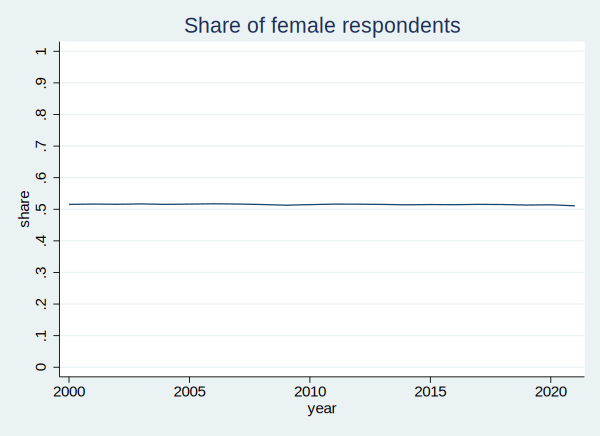

In [48]:
collapse fem_share, by(year)
twoway (line fem_share year, sort), ytitle(share) xtitle(year) title(Share of female respondents) yscale(range(0.00 1.00)) ylabel(0(0.1)1)

In [49]:
use "workfile01.dta", clear

I strongly recommend to drop the auxiliary variables after that, so that the table stays clear and tidy.

In [50]:
drop fem_* both_* respondents_*

### What is the average yearly share of respondents holding at least a college degree overall? How does the average annual share evolve from 2000-2020?

For the average share of respondents holding a college degree you have to calculated the share of respondents instead the share of responses. You also have to keep in mind that individuals are paticipating up to four times a year in the survey.
The following code considers this as well as the fact that a person can obtain college degree between the waves of interviews. The highes degree obtained within a year will be counted.

In [51]:
tab educ
gen college = .
replace college = 1 if inlist(educ, 125, 124, 092, 123, 111)

egen tag_college = tag(year cpsidp college)
egen tag_respondents = tag(year cpsidp)

egen college_total = total(tag_college), by(year)
egen respondents_total = total(tag_respondents), by(year)

gen college_share = college_total / respondents_total



          educational attainment recode |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
                        1. niu or blank |          9        0.00        0.00
                   2. none or preschool |     29,001        0.26        0.26
               10. grades 1, 2, 3, or 4 |     55,654        0.49        0.75
                      20. grades 5 or 6 |    124,978        1.10        1.85
                      30. grades 7 or 8 |    221,665        1.95        3.80
                            40. grade 9 |    335,882        2.96        6.76
                           50. grade 10 |    414,008        3.65       10.40
                           60. grade 11 |    447,258        3.94       14.34
             71. 12th grade, no diploma |    165,357        1.46       15.80
  73. high school diploma or equivalent |  3,219,208       28.35       44.15
         81. some college but no degree |  2,086,324       18.37       62.

In [52]:
save "workfile01.dta", replace

file workfile01.dta saved


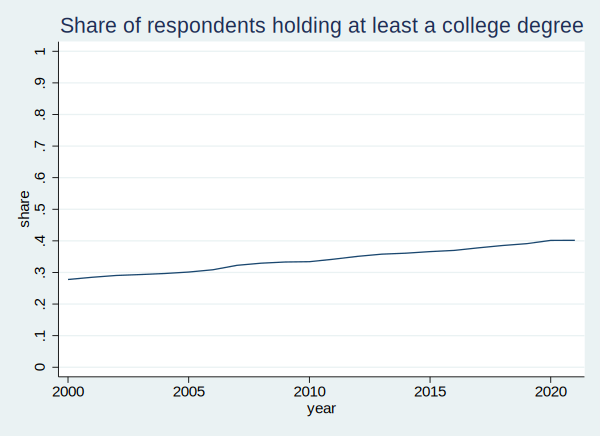

In [53]:
collapse college_share, by(year)
twoway (line college_share year, sort), ytitle(share) xtitle(year) title(Share of respondents holding at least a college degree) yscale(range(0.00 1.00)) ylabel(0(0.1)1)

In [54]:
use "workfile01.dta", clear

In [55]:
drop college* respondents*

### Plot the distribution of hourly wages for the years 2001, 2009 and 2018.

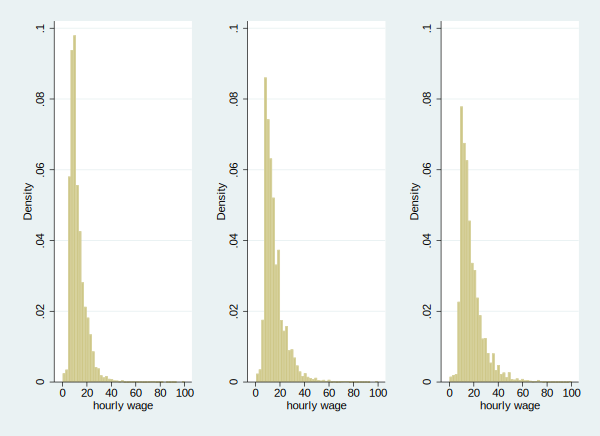

In [60]:
mvdecode(hourwage), mv(999.99)

qui histogram hourwage if year==2001, name(h2001) yscale(range(0 .1)) ylabel(0(0.02)0.1)
qui histogram hourwage if year==2009, name(h2009) yscale(range(0 .1)) ylabel(0(0.02)0.1)
qui histogram hourwage if year==2018, name(h2018) yscale(range(0 .1)) ylabel(0(0.02)0.1)
graph combine h2001 h2009 h2018, col(3)

### Is the data representative of the distribution of the population across all 50 U.S. states in 2017?

In [61]:
tab statecensus


                    state (census code) |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
                              11. maine |    171,775        1.51        1.51
                      12. new hampshire |    208,615        1.84        3.35
                            13. vermont |    161,983        1.43        4.78
                      14. massachusetts |    206,391        1.82        6.59
                       15. rhode island |    163,331        1.44        8.03
                        16. connecticut |    200,132        1.76        9.80
                           21. new york |    508,971        4.48       14.28
                         22. new jersey |    249,338        2.20       16.47
                       23. pennsylvania |    358,675        3.16       19.63
                               31. ohio |    323,555        2.85       22.48
                            32. indiana |    185,484        1.63       24.1

In [62]:
egen distinct2017 = tag(cpsidp year) if year == 2017
tab statecensus if distinct2017 == 1




                    state (census code) |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
                              11. maine |      1,399        0.89        0.89
                      12. new hampshire |      2,136        1.36        2.26
                            13. vermont |      2,058        1.31        3.57
                      14. massachusetts |      3,368        2.15        5.72
                       15. rhode island |      1,436        0.92        6.64
                        16. connecticut |      1,602        1.02        7.66
                           21. new york |      6,411        4.09       11.75
                         22. new jersey |      3,165        2.02       13.78
                       23. pennsylvania |      4,433        2.83       16.61
                               31. ohio |      4,024        2.57       19.17
                            32. indiana |      2,568        1.64       20

Compare the frequencies with official figures, which you can finde here:
<a href=https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html>census.gov</a>

### You have the task to create statistics of employment status, occupation, wage and education. <br>You are also asked to do this analysis for the subpopulations defined by age, race, sex and citizenship.<br> How would you proceed?

The idea of this task is to rise awareness of the different scale of measurements present in this data set.
E.g., there is no point in calculating 5 point statistics for a nominal variable. Frequency tables are a helpful start for a data analysis.

There are different ways in stata to create meaningful statistics. When doing so for various subpopulations, you should avoid to render the statistics to granular, i.e. analsing too many groups. The more result tables you have, the harder it gets to compare them.


In [ ]:
/* There exist a variety of commands that yield a quick overview of the data as well as some related basic statistics
and further information.*/
describe

In [ ]:
codebook

In [ ]:
tab year

In [ ]:
summarize age, detail

In [ ]:
// Create frequency tables using the tabulate command
tabulate educ sex, row

In [ ]:
numlabel, add
tab educ

Value 92 represents associate's degrees. Those degrees academic degrees in the US and in other countries who introduced it. However, in most countries of the EU those degrees are not considered academic.
Now we have to decide whether to label those degrees as academic college degrees or not.
I choose not to do so, since the results of my analysis would be hard to compare with the situation in other countries where such a degree is unknown.

If you happen to work with this variable in your project, you may decide to label associate's degrees differently. However you proceed, please elaborate on your decision.

In [ ]:
/* create new variable college that is 0 for every degree below college, 1 for every degree equivalent
or above college and .m for missing values */

gen college = 0
replace college = 1 if educ > 92
replace college = .m if educ == 1

In [ ]:
tab sex college, row

In [ ]:
bysort sex college: tab occ empstat, row

In [ ]:
numlabel, add
tabulate faminc

In [ ]:
mvdecode(faminc), mv(996 997 999)

In [ ]:
tabstat faminc, by(year) statistics(p25, median, p75)

In [ ]:
graph bar (count), over(faminc) over(year, label(angle(v))) asyvars stack percent

# Effects of wage on hours worked (intensive margin) [Task 2]

In [24]:
*load data
cd "C:\Users\Hannes\Documents"
use "session01.dta", clear


C:\Users\Hannes\Documents



In [ ]:
gen hwage_r = round(hourwage, 1)

In [ ]:
tab hwage_r

<a href="https://cps.ipums.org/cps-action/variables/HOURWAGE#description_section"> IPUM's description of hourwage:</a>
>HOURWAGE reports how much the respondent earned per hour in the current job, for those workers paid an hourly wage (and coded as "2" in PAIDHOUR). Amounts are expressed as they were reported to the interviewer; users must adjust for inflation using Consumer Price Index adjustment factors. Researchers should use the EARNWT weight with this variable. <br> <br> Users should note that HOURWAGE originally had two implied decimal places, but was revised so that the command files provided by IPUMS divide HOURWAGE by 100. <br> <br> HOURWAGE is one of the <a href = "https://cps.ipums.org/cps/outgoing_rotation_notes.shtml">Outgoing Rotation/Earner Study</a> questions.

In [ ]:
summarize hourwage, detail


The 10th percentile is 999.99, which means "not in universe". Thus we are lacking information on hourly wage for at least 90% of the respondents.
The variable for wages in topcoded for the sake of discretion: Every wage that would result in a yearly income of more than \$ 100,000 (1985-2002) and \\$ 150,000 (since 2003) is coded as 99.99 in hourwage.

In [79]:
mvdecode(hourwage), mv(999.99)

    hourwage: 10334665 missing values generated


In [ ]:
summarize hourwage, detail

So how many topcoded values do we have in hourwage?

In [80]:
tab hourwage if hourwage == 99.99


hourly wage |      Freq.     Percent        Cum.
------------+-----------------------------------
      99.99 |        147      100.00      100.00
------------+-----------------------------------
      Total |        147      100.00


In [ ]:
sum hourwage if hourwage < 99.99

In [81]:
mvdecode(hourwage), mv(99.99)

    hourwage: 147 missing values generated


In [ ]:
tab month if !missing(hourwage)

### Examine the effect of wage on hours worked (intensive margin of labour supply) using an OLS.

In [ ]:
numlabel , add
tabulate uhrswork1

uhrswork1 = 999 denotes missing values. But how do we handle varying hours (i.e. uhrswork1=997)? In a way we are lacking information here as well.

In [ ]:
tab empstat

From our understanding individuals with $empstat \in [1, 12]$ should work at least some hours a week.

In [82]:
tab uhrswork1 if inrange(empstat, 1, 12)


   hours usually |
 worked per week |
     at main job |      Freq.     Percent        Cum.
-----------------+-----------------------------------
      0. 0 hours |      6,588        0.09        0.09
               1 |      3,188        0.04        0.14
               2 |      7,959        0.11        0.25
               3 |      7,698        0.11        0.36
               4 |     13,467        0.19        0.54
               5 |     17,100        0.24        0.78
               6 |     15,871        0.22        1.00
               7 |      6,084        0.09        1.09
               8 |     32,912        0.46        1.55
               9 |      5,634        0.08        1.63
              10 |     65,531        0.92        2.54
              11 |      2,631        0.04        2.58
              12 |     38,263        0.53        3.12
              13 |      4,294        0.06        3.18
              14 |      7,845        0.11        3.29
              15 |     82,197        1.15  

uhrswork1 = 997 affects approximately 7.6 % of all respondents having a job. We are going to exclude 997 an 999 from the analysis, since we are interested in effects on the intensive margin.
Keep in mind that the missing of data (or in our case a varying in hours) could yield some important implications as well.

To elaborate on that, let us have a brief look at missing values.

#### Missing Completely At Random (MCAR)
The occurence of a missing value in Y does not depend on realisations of any other variable $X_i$ nor does it depend on other realisations of Y itself.<br>
e.g.
- transmission errors

#### Missing At Random (MAR)
The occurence of a missing value can be fully explained by the other variables $X_i$.<br>
e.g.
- males are less likely to state existing mental problems - regardless of whether they have mentral problems or not

#### Missing Not At Random (MNAR)
The occurence of a missing value in Y does depend on realisations of Y itself and can also depend on realisations of other variables $X_i$.<br>
e.g.
- People with high income are less likely to state their income.



Keep in mind that the missing of data might hold some information as well.

In [83]:
mvdecode(uhrswork1), mv(999 997)

In [84]:
reg uhrswork1 hourwage [pweight=earnwt]

(sum of wgt is 8,740,213,304.43)

Linear regression                               Number of obs     =    952,574
                                                F(1, 952572)      =   22347.36
                                                Prob > F          =     0.0000
                                                R-squared         =     0.0501
                                                Root MSE          =     9.6503

------------------------------------------------------------------------------
             |               Robust
   uhrswork1 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    hourwage |   .2388114   .0015975   149.49   0.000     .2356803    .2419425
       _cons |   32.61111   .0278884  1169.34   0.000     32.55645    32.66577
------------------------------------------------------------------------------


OLS minimizes
$$\sum_{i=1}^n (y_i - (\alpha1 + \beta x_i))^2$$
Introducing a weight $w_i$ (probability weight) for every observation:
$$\sum_{i=1}^n w_i^2 (y_i - (\alpha1 + \beta x_i))^2$$
$$\sum_{i=1}^n (w_iy_i - (\alpha w_i + \beta w_i x_i))^2$$

### Determine the correlation between wages and hours worked. What is the difference between OLS and correlation?

In [85]:
corr uhrswork1 hourwage

(obs=955,096)

             | uhrswo~1 hourwage
-------------+------------------
   uhrswork1 |   1.0000
    hourwage |   0.2343   1.0000



The default correlation command does not feature pweights. However, for point estimates of the correlation it is recommended to use aweight instead - though it delivers bogus p-values.
https://www.stata.com/support

In [86]:
corr uhrswork1 hourwage [aweight=earnwt]
display round(r(rho)^2, .0001)


(sum of wgt is 8,740,213,304.43)
(obs=952,574)

             | uhrswo~1 hourwage
-------------+------------------
   uhrswork1 |   1.0000
    hourwage |   0.2239   1.0000


.0501


### Add age, sex and citizenship to your model. Include the log of wage and hours. Interpret the results of a multivariate regression.

In [2]:
numlabel, add
tab citizen




                citizenship status |      Freq.     Percent        Cum.
-----------------------------------+-----------------------------------
                    1. born in u.s |  9,742,527       85.80       85.80
          2. born in u.s. outlying |     58,904        0.52       86.32
3. born abroad of american parents |    100,987        0.89       87.21
            4. naturalized citizen |    636,648        5.61       92.82
                  5. not a citizen |    815,271        7.18      100.00
-----------------------------------+-----------------------------------
                             Total | 11,354,337      100.00


In [25]:
recode citizen (1/4 = 1) (5 = 0), gen (ctz)
label define citizen 0 "not a citizen" 1 "citizen"
label value ctz citizen


(1611810 differences between citizen and ctz)




In [26]:
tab ctz, missing


    RECODE of |
      citizen |
 (citizenship |
      status) |      Freq.     Percent        Cum.
--------------+-----------------------------------
not a citizen |    815,271        7.18        7.18
      citizen | 10,539,066       92.82      100.00
--------------+-----------------------------------
        Total | 11,354,337      100.00


(bin=70, start=15, width=.74285714)


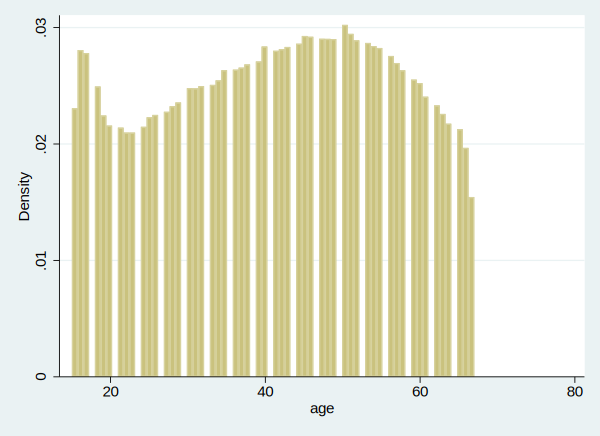

In [22]:
hist age

In your own data extract, you might notice the accumulation at ages 80 and 85? <br><br>
The <a href="https://cps.ipums.org/cps-action/variables/age#codes_section">description</a> of the variable age on the ipums website holds the following:<br>
>Top codes:<br>
1962-1987: 99+ coded as 99<br>
1988-2001: 90+ coded as 90<br>
2002-2003: 80+ coded as 80<br>
2004-onward: 80-84 coded as 80, 85+ coded as 85<br>

Does this affect our analysis? How many people aged 80 and above still participate in the job market?<br>
(First guess: Not that much.)

In [89]:
* creating logs
gen log_uhrswork1 = log(uhrswork1)
gen log_hourwage = log(hourwage)


(4,206,526 missing values generated)

(10,334,812 missing values generated)


In [90]:
* linear regression
reg log_uhrswork1 log_hourwage age i.sex i.ctz [pweight=earnwt]

(sum of wgt is 8,735,618,218.398)

Linear regression                               Number of obs     =    952,041
                                                F(4, 952036)      =   19380.34
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1133
                                                Root MSE          =      .3694

------------------------------------------------------------------------------
             |               Robust
log_uhrswo~1 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
log_hourwage |   .1672318   .0010219   163.65   0.000     .1652289    .1692347
         age |    .003772   .0000397    95.09   0.000     .0036942    .0038497
             |
         sex |
  2. female  |  -.1185369   .0008945  -132.51   0.000    -.1202902   -.1167837
             |
         ctz |

Note: Stata created a appropriate cutoff for the dummies i.sex by itself. No need to transform the variable into a binary 0-1 format.

Instead of creating a new dummy variable for citizen you can also tell stata where to set the cutoff for a dummy in the regression by typing **i5.citizen**.
Stata will construct a dummy variable that is one for citizen greater or equal 5 and zero otherwise.
Note that this is the exact opposite definition of the dummy variable we have created.

In [91]:
reg log_uhrswork1 log_hourwage age i.sex i5.citizen [pweight=earnwt]

(sum of wgt is 8,735,618,218.398)

Linear regression                               Number of obs     =    952,041
                                                F(4, 952036)      =   19380.34
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1133
                                                Root MSE          =      .3694

-------------------------------------------------------------------------------
              |               Robust
log_uhrswork1 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
 log_hourwage |   .1672318   .0010219   163.65   0.000     .1652289    .1692347
          age |    .003772   .0000397    95.09   0.000     .0036942    .0038497
              |
          sex |
   2. female  |  -.1185369   .0008945  -132.51   0.000    -.1202902   -.1167837
              |
    

The absolute value of the citizen dummy is the same as for the former regression, only the sign of the coefficient, the t-value and the confidence interval changes.
Because of the changing reference level of both models (1 denotes two different things in citizen2 and i5.citizen) the intercept is slightly different, too.

**Run the following multivariate regression:<br><br><center>
\\( \log hours = \beta_0 + \beta_1 \log wage_i + \beta_2 age_i + \beta_3 educ2_i + \beta_4 sex_i + \beta_5 (educ2_i \times sex_i)\\);</center><br> with educ2 being a dummy variable for a respondent holding at least a college degree.
Interpret your results.**

In [35]:
numlabel, add
tab educ




          educational attainment recode |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
                        1. niu or blank |          9        0.00        0.00
                   2. none or preschool |     29,001        0.26        0.26
               10. grades 1, 2, 3, or 4 |     55,654        0.49        0.75
                      20. grades 5 or 6 |    124,978        1.10        1.85
                      30. grades 7 or 8 |    221,665        1.95        3.80
                            40. grade 9 |    335,882        2.96        6.76
                           50. grade 10 |    414,008        3.65       10.40
                           60. grade 11 |    447,258        3.94       14.34
             71. 12th grade, no diploma |    165,357        1.46       15.80
  73. high school diploma or equivalent |  3,219,208       28.35       44.15
         81. some college but no degree |  2,086,324       18.37       62

In [36]:
recode educ (1 = .m) (092 111 123 124 125 = 1) (else = 0), gen(educ2)

(11354337 differences between educ and educ2)


In [38]:
label define educ2 .m "missing answer" 0 "no college" 1 "college"
label value educ2 educ2

In [39]:
tab educ2, missing


RECODE of educ |
  (educational |
    attainment |
       recode) |      Freq.     Percent        Cum.
---------------+-----------------------------------
    no college |  7,605,980       66.99       66.99
       college |  3,748,348       33.01      100.00
missing answer |          9        0.00      100.00
---------------+-----------------------------------
         Total | 11,354,337      100.00


In [92]:
reg log_uhrswork1 log_hourwage age i.sex##i.educ2 [pweight=earnwt]

(sum of wgt is 8,735,618,218.398)

Linear regression                               Number of obs     =    952,041
                                                F(5, 952035)      =   15926.79
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1128
                                                Root MSE          =     .36952

------------------------------------------------------------------------------
             |               Robust
log_uhrswo~1 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
log_hourwage |   .1770907   .0010586   167.29   0.000     .1750159    .1791655
         age |   .0037393   .0000399    93.65   0.000     .0036611    .0038176
             |
         sex |
  2. female  |  -.1105777   .0010262  -107.75   0.000    -.1125891   -.1085663
             |
       educ2 |

ceteris paribus:

\\( \beta_3 educ2_i + \beta_4 sex_i + \beta_5 (educ2_i \times sex_i) \\)<br><br>

Plugging in the estimates for the coefficients and calculating the total coefficient for all four subpopulations defined by the two binary dummy variables *sex* and *college* yields:
<br>

male and no college ==>  \\( \beta_3*0 + \beta_4*0 + \beta_5*(0 \times 0) \\)<br>
0 * (-.0389158) + 0 * (-.1105777) -.0246875 * (0x0) = 0 (reference group) <br><br>
male and college ==> \\( \beta_3*1 + \beta_4*0 + \beta_5*(1 \times 0) \\)<br>
1 * (-.0389158) + 0 * (-.1105777) -.0246875 * (1x0) = -.0389158 <br><br>
female and no college ==> \\( \beta_3*0 + \beta_4*1 + \beta_5*(0 \times 1) \\)<br>
0 * (-.0389158) + 1 * (-.1105777) -.0246875 * (0x1) = -.1105777 <br><br>
female and collge ==>  \\( \beta_3*1 + \beta_4*1 + \beta_5*(1 \times 1) \\)<br>
1 * (-.0389158) + 1 * (-.1105777) -.0246875 * (1x1) = -.174181

The coefficients of the dummy variable depict the effect of being a male holding a college degree as well as of being a female holding or not holding a college degree relative to being a male not holding a college degree.<br>
Pay attention to the reference group when interpreting your results 

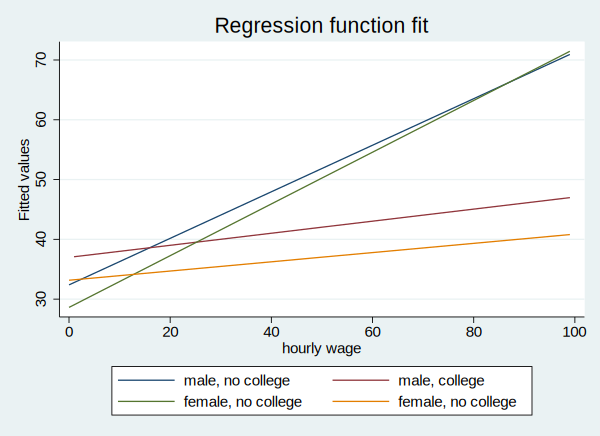

In [98]:
twoway (lfit uhrswork1 hourwage if sex == 1 & educ2 == 0) (lfit uhrswork1 hourwage if sex == 1 & educ2 == 1) (lfit uhrswork1 hourwage if sex == 2 & educ2 == 0) (lfit uhrswork1 hourwage if sex == 2 & educ2 == 1), legend(cols(2) order(1 "male, no college" 2 "male, college" 3 "female, no college" 4 "female, no college")) title("Regression function fit", color(gs0)) 

In [99]:
reg uhrswork1 log_hourwage age i.sex##i.educ2 [pweight=earnwt]

(sum of wgt is 8,740,213,304.43)

Linear regression                               Number of obs     =    952,574
                                                F(5, 952568)      =   21161.61
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1380
                                                Root MSE          =      9.193

------------------------------------------------------------------------------
             |               Robust
   uhrswork1 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
log_hourwage |   4.994455   .0263433   189.59   0.000     4.942823    5.046087
         age |   .0913921   .0009462    96.58   0.000     .0895375    .0932467
             |
         sex |
  2. female  |  -3.386369   .0252816  -133.95   0.000     -3.43592   -3.336818
             |
       educ2 |


In [100]:
reg log_uhrswork1 hourwage age i.sex##i.educ2 [pweight=earnwt]

(sum of wgt is 8,735,618,218.398)

Linear regression                               Number of obs     =    952,041
                                                F(5, 952035)      =   11881.97
                                                Prob > F          =     0.0000
                                                R-squared         =     0.0889
                                                Root MSE          =     .37445

------------------------------------------------------------------------------
             |               Robust
log_uhrswo~1 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    hourwage |   .0063358   .0000632   100.31   0.000      .006212    .0064596
         age |   .0046301   .0000404   114.56   0.000     .0045509    .0047094
             |
         sex |
  2. female  |   -.127375   .0010303  -123.62   0.000    -.1293944   -.1253555
             |
       educ2 |

In [101]:
reg uhrswork1 hourwage age i.sex##i.educ2 [pweight=earnwt]

(sum of wgt is 8,740,213,304.43)

Linear regression                               Number of obs     =    952,574
                                                F(5, 952568)      =   15812.80
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1101
                                                Root MSE          =     9.3406

------------------------------------------------------------------------------
             |               Robust
   uhrswork1 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    hourwage |   .1860219    .001619   114.90   0.000     .1828486    .1891952
         age |   .1152636   .0009575   120.38   0.000     .1133869    .1171403
             |
         sex |
  2. female  |  -3.837657   .0255038  -150.47   0.000    -3.887644   -3.787671
             |
       educ2 |


\\( y = \beta_0 + \beta_1 x \\)

| <center>**y / x**</center> | <center>**level**</center> | <center>**log**</center> |
| :---        |    :----:   |          ---: |
| **level** | change in x by 1 unit changes y by \\( \beta_1 \\) |  change in x by 1 % changes y by <br> \\( \beta_1 / 100\\) units |
| **log** | change in x by 1 unit changes y <br> **approximately** by  \\( \beta_1 \times 100 \% \\) | change in x by 1 % changes y by \\( \beta_1 \% \\)|

## Employment Flows (Task 3)

### Group Work (15-20 min)
**The statistics of the Bureau of Labor Statistics base on data from the CPS.**

**Derive information on monthly employment flows. Disregard marginal in- and outflows.**
**Do so for every month in your data.**

<img src="https://i.imgflip.com/5skekr.jpg" title="made at imgflip.com"/></a><div><a href="https://imgflip.com/memegenerator">from Imgflip Meme Generator</a></div>

In [1]:
cd "C:\Users\Hannes\Documents"
use "session01.dta", clear


C:\Users\Hannes\Documents



In [2]:
numlabel, add
tab empstat, missing




                 employment status |      Freq.     Percent        Cum.
-----------------------------------+-----------------------------------
                   1. armed forces |     50,414        0.44        0.44
                       10. at work |  7,451,380       65.63       66.07
12. has job, not at work last week |    299,849        2.64       68.71
21. unemployed, experienced worker |    406,801        3.58       72.29
        22. unemployed, new worker |     39,493        0.35       72.64
          32. nilf, unable to work |    588,222        5.18       77.82
                   34. nilf, other |  1,778,746       15.67       93.49
                 36. nilf, retired |    739,432        6.51      100.00
-----------------------------------+-----------------------------------
                             Total | 11,354,337      100.00


In [3]:
recode empstat (1/12 = 1) (21 22 = 2) (32/36 = 3), gen(emp2)
label define emp2 1 "employed" 2 "unemployed" 3 "not in labor force"
label value emp2 emp2


(11303923 differences between empstat and emp2)




In [4]:
tab emp2


 RECODE of empstat |
       (employment |
           status) |      Freq.     Percent        Cum.
-------------------+-----------------------------------
          employed |  7,801,643       68.71       68.71
        unemployed |    446,294        3.93       72.64
not in labor force |  3,106,400       27.36      100.00
-------------------+-----------------------------------
             Total | 11,354,337      100.00


In [5]:
bysort cpsidp (mish): gen lead_mish = mish[_n + 1]
bysort cpsidp (mish): gen lead_emp = emp2[_n + 1] if lead_mish - mish == 1


(1,773,756 missing values generated)

(1,993,760 missing values generated)


In [6]:
gen empflow = emp2 * 10 + lead_emp
label define empflow 11 "EE" 12 "EU" 13 "EN" 21 "UE" 22 "UU" 23 "UN" 31 "NE" 32 "NU" 33 "NN"
label value empflow empflow
tab empflow


(1,993,760 missing values generated)




    empflow |      Freq.     Percent        Cum.
------------+-----------------------------------
         EE |  6,162,616       65.84       65.84
         EU |     88,037        0.94       66.78
         EN |    197,102        2.11       68.88
         UE |     95,966        1.03       69.91
         UU |    184,199        1.97       71.88
         UN |     84,685        0.90       72.78
         NE |    179,394        1.92       74.70
         NU |     83,560        0.89       75.59
         NN |  2,285,018       24.41      100.00
------------+-----------------------------------
      Total |  9,360,577      100.00


In [7]:
tab month empflow if year == 2020


             |                   empflow
       month |        EE         EU         EN         UE |     Total
-------------+--------------------------------------------+----------
  1. january |    20,794        234        601        225 |    31,327 
 2. february |    19,648        353        697        194 |    29,955 
    3. march |    16,075      1,746      1,061        184 |    27,558 
    4. april |    15,014        490        483        934 |    26,863 
      5. may |    14,684        351        437        837 |    25,242 
     6. june |    14,229        303        457        563 |    23,491 
     7. july |    14,744        198        509        508 |    23,875 
   8. august |    15,163        220        554        414 |    24,303 
9. september |    15,967        221        471        329 |    25,363 
 10. october |    16,036        183        507        286 |    25,126 
11. november |    15,248        209        475        211 |    23,774 
12. december |    13,360        181  

**Find out the monthly flows for the U.S. for a period of years covered by your cps sample aswell.<br>
Adequate data is provided by the Bureau of Labor Statistics. <a href="https://www.bls.gov/webapps/legacy/cpsflowstab.htm">LINK</a>
<br><br>
Try to visualise the monthly flows.**

**You can also continue to work on your CPS data instead.**

*Note: Not all tasks have to be solved using Stata. Especially when working with smaller data sets, it is much more convenient to explore and modify data using a spreadsheet program.*

See my example here: <a href="https://docs.google.com/presentation/d/1m5qdBlHHZF95bBo4Ee0XYS4B5TbNdPM8sOIOr3LAae0/edit#slide=id.gb091b769bf_0_21">Link to Google Slides</a> <br><br>
<a href="https://docs.google.com/spreadsheets/d/1_Vl2oIEV1sOPqyCJ91uyk4psLSqTm1h7ktoKX1aDQMA/edit?usp=sharing">Related Spreadsheet</a>

In [8]:
save "session02.dta", replace

file session02.dta saved


In [9]:
collapse (count) countflow = cpsidp, by(year month empflow)

In [10]:
gen date = ym(year,month)
format date %tmMCY

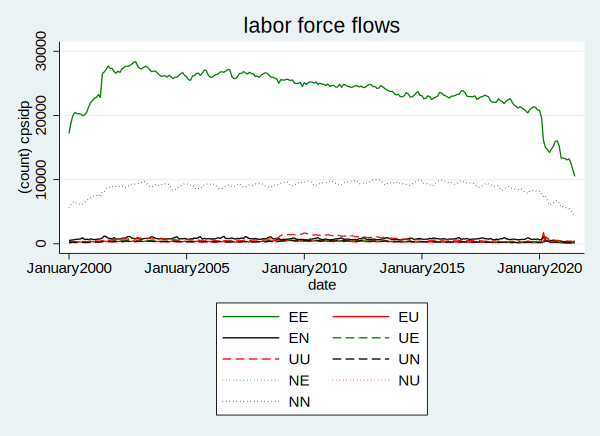

In [11]:
twoway (line countflow date if empflow == 11, lpattern(solid) lcolor(green)) ///
(line countflow date if empflow == 12, lpattern(solid) lcolor(red)) ///
(line countflow date if empflow == 13, lpattern(solid) lcolor(black)) ///
(line countflow date if empflow == 21, lpattern(dash) lcolor(green)) ///
(line countflow date if empflow == 22, lpattern(dash) lcolor(red)) ///
(line countflow date if empflow == 23, lpattern(dash) lcolor(black)) ///
(line countflow date if empflow == 31, lpattern(dot) lcolor(green)) ///
(line countflow date if empflow == 32, lpattern(dot) lcolor(red)) ///
(line countflow date if empflow == 33, lpattern(dot) lcolor(black)), ///
legend(cols(2) order(1 "EE" 2 "EU" 3 "EN" 4 "UE" 5 "UU" 6 "UN" 7 "NE" 8 "NU" 9 "NN")) ///
title("labor force flows", color(gs0))

In [12]:
bysort date: egen total_empflow = total(countflow)

In [13]:
gen share = countflow / total_empflow

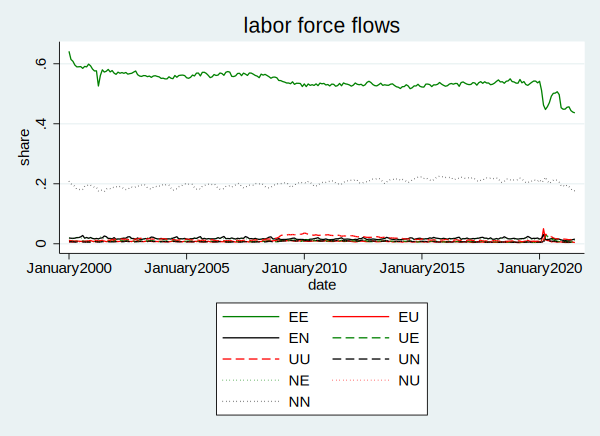

In [14]:
twoway (line share date if empflow == 11, lpattern(solid) lcolor(green)) ///
(line share date if empflow == 12, lpattern(solid) lcolor(red)) ///
(line share date if empflow == 13, lpattern(solid) lcolor(black)) ///
(line share date if empflow == 21, lpattern(dash) lcolor(green)) ///
(line share date if empflow == 22, lpattern(dash) lcolor(red)) ///
(line share date if empflow == 23, lpattern(dash) lcolor(black)) ///
(line share date if empflow == 31, lpattern(dot) lcolor(green)) ///
(line share date if empflow == 32, lpattern(dot) lcolor(red)) ///
(line share date if empflow == 33, lpattern(dot) lcolor(black)), ///
legend(cols(2) order(1 "EE" 2 "EU" 3 "EN" 4 "UE" 5 "UU" 6 "UN" 7 "NE" 8 "NU" 9 "NN")) ///
title("labor force flows", color(gs0))

In [15]:
tsset empflow date, monthly

       panel variable:  empflow (unbalanced)
        time variable:  date, January2000 to July2021
                delta:  1 month


Using the Hodrick-Prescott filter to decompose the flows into a cylclical and a trend component with a smoothing parameter of 14400 for monhtly data.

In [16]:
tsfilter hp ct=share, trend(trendvar) smooth(14400)

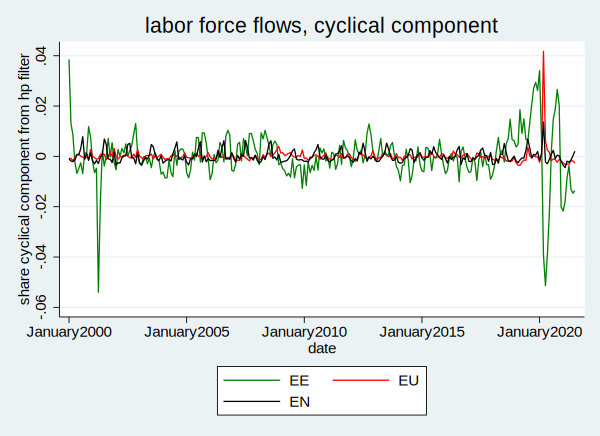

In [17]:
twoway (line ct date if empflow == 11, lpattern(solid) lcolor(green)) ///
(line ct date if empflow == 12, lpattern(solid) lcolor(red)) ///
(line ct date if empflow == 13, lpattern(solid) lcolor(black)), ///
legend(cols(2) order(1 "EE" 2 "EU" 3 "EN")) ///
title("labor force flows, cyclical component", color(gs0))

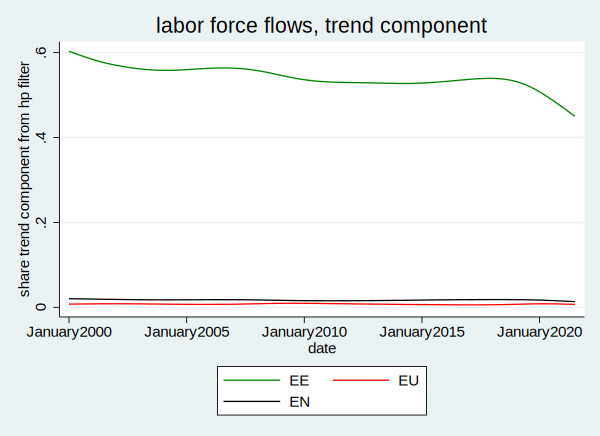

In [18]:
twoway (line trendvar date if empflow == 11, lpattern(solid) lcolor(green)) ///
(line trendvar date if empflow == 12, lpattern(solid) lcolor(red)) ///
(line trendvar date if empflow == 13, lpattern(solid) lcolor(black)), ///
legend(cols(2) order(1 "EE" 2 "EU" 3 "EN")) ///
title("labor force flows, trend component", color(gs0))

In [19]:
use "session02.dta", clear

In [20]:
collapse (count) countflow = cpsidp, by(year month empflow sex)

In [21]:
gen date = ym(year,month)
format date %tmMCY

In [22]:
tab empflow, missing


    empflow |      Freq.     Percent        Cum.
------------+-----------------------------------
         EE |        518       10.00       10.00
         EU |        518       10.00       19.99
         EN |        518       10.00       29.99
         UE |        518       10.00       39.98
         UU |        518       10.00       49.98
         UN |        518       10.00       59.98
         NE |        518       10.00       69.97
         NU |        518       10.00       79.97
         NN |        518       10.00       89.97
          . |        520       10.03      100.00
------------+-----------------------------------
      Total |      5,182      100.00


In [23]:
drop if empflow == .

(520 observations deleted)


In [24]:
gen empflowsex = (empflow * 10) + sex

In [25]:
tsset empflowsex date, monthly

       panel variable:  empflowsex (strongly balanced)
        time variable:  date, January2000 to July2021
                delta:  1 month


In [26]:
bysort date sex: egen total_empflow = total(countflow)
gen share = countflow / total_empflow

In [27]:
tsfilter hp ct=share, trend(trendvar) smooth(14400)

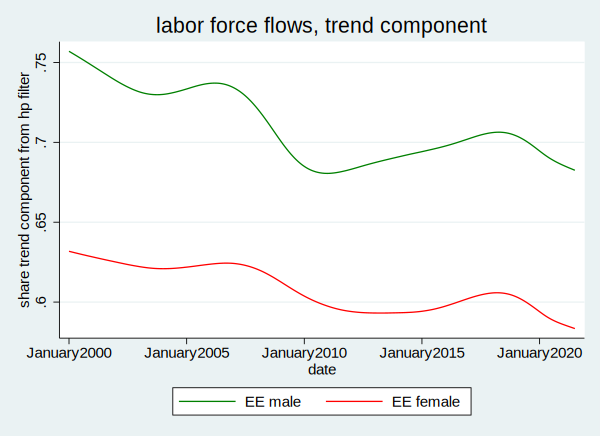

In [28]:
twoway (line trendvar date if empflow == 11 & sex == 1, lpattern(solid) lcolor(green)) ///
(line trendvar date if empflow == 11 & sex == 2, lpattern(solid) lcolor(red)), ///
legend(cols(2) order(1 "EE male" 2 "EE female")) ///
title("labor force flows, trend component", color(gs0))

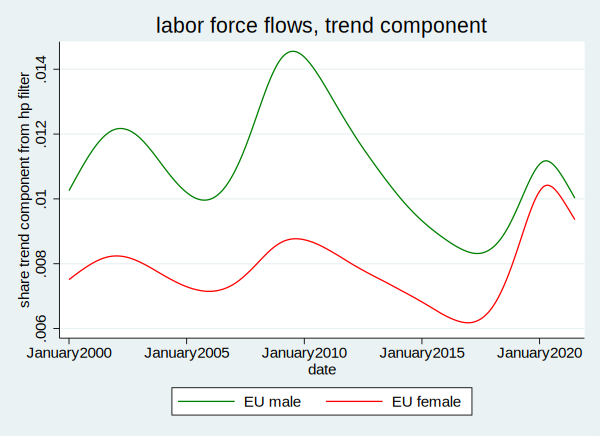

In [29]:
twoway (line trendvar date if empflow == 12 & sex == 1, lpattern(solid) lcolor(green)) ///
(line trendvar date if empflow == 12 & sex == 2, lpattern(solid) lcolor(red)), ///
legend(cols(2) order(1 "EU male" 2 "EU female")) ///
title("labor force flows, trend component", color(gs0))

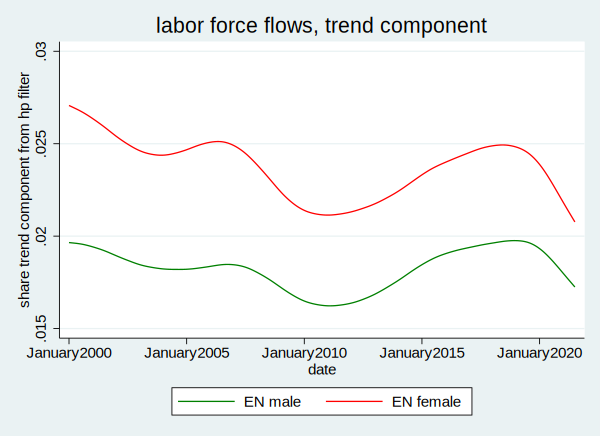

In [30]:
twoway (line trendvar date if empflow == 13 & sex == 1, lpattern(solid) lcolor(green)) ///
(line trendvar date if empflow == 13 & sex == 2, lpattern(solid) lcolor(red)), ///
legend(cols(2) order(1 "EN male" 2 "EN female")) ///
title("labor force flows, trend component", color(gs0))

**Calculate the monthly unemployment rate for for the months from 2018 onwards.** <br>
**Plot the time series.**

In [31]:
use "session02.dta", clear

In [32]:
gen date = ym(year,month)
format date %tmMCY

In [33]:
collapse (count) frequency = cpsidp, by(date year month emp2)

In [38]:
bysort date: egen total_frequency = total(frequency)

In [34]:
bysort date: egen total_laborforce = total(frequency) if emp2 < 3

(260 missing values generated)


In [35]:
gen ushare = frequency / total_laborforce if emp2 == 2

(520 missing values generated)


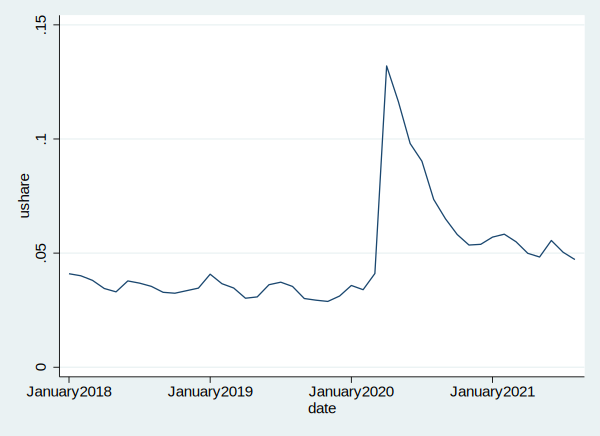

In [36]:
twoway (line ushare date if year >= 2018)

**Add a line for the share of individuas not being part of the labor force in the same plot.**

In [39]:
gen nshare = frequency / total_frequency if emp2 == 3

(520 missing values generated)


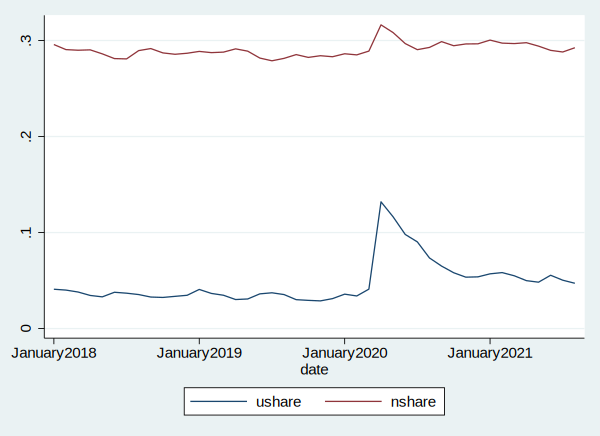

In [41]:
twoway (line ushare date if year >= 2018) (line nshare date if year >= 2018)

**Create a time series for the mean age of people being unemployed. What effect on the mean age did the Covid crisis show?**

In [112]:
use "session02.dta", clear

In [113]:
gen date = ym(year,month)
format date %tmMCY

In [114]:
collapse (mean) mean_age = age (count) count_in = cpsidp, by(year month date emp2)

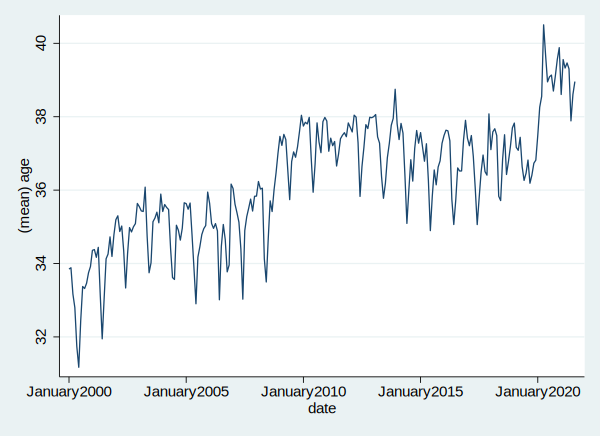

In [115]:
twoway (line mean_age date if emp2 == 2)

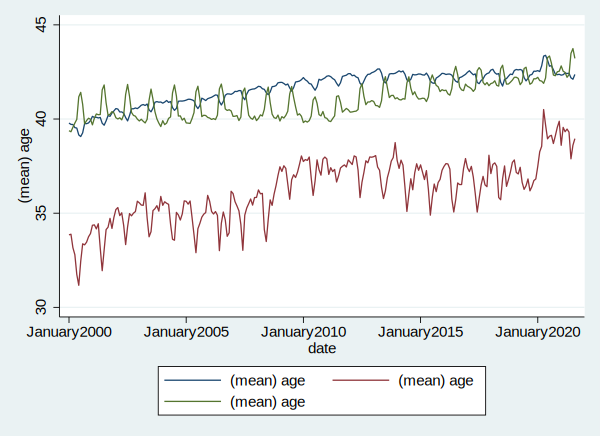

In [116]:
twoway (line mean_age date if emp2 == 1) (line mean_age date if emp2 == 2) (line mean_age date if emp2 == 3)

In [101]:
tsset emp2 date, monthly

       panel variable:  emp2 (strongly balanced)
        time variable:  date, January2000 to August2021
                delta:  1 month


In [102]:
tsfilter hp ct=mean_age, trend(trendvar) smooth(14400)

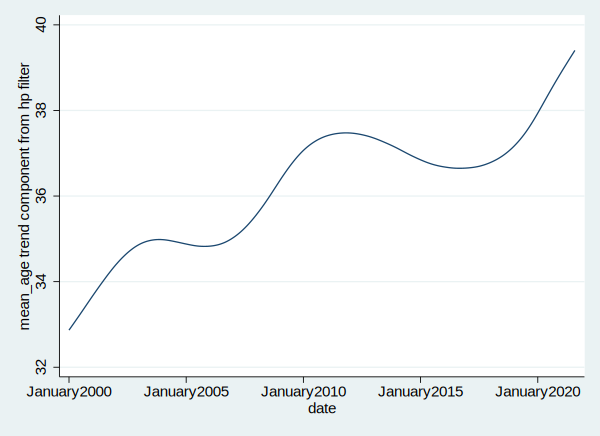

In [104]:
twoway (line trendvar date if emp2 == 2)

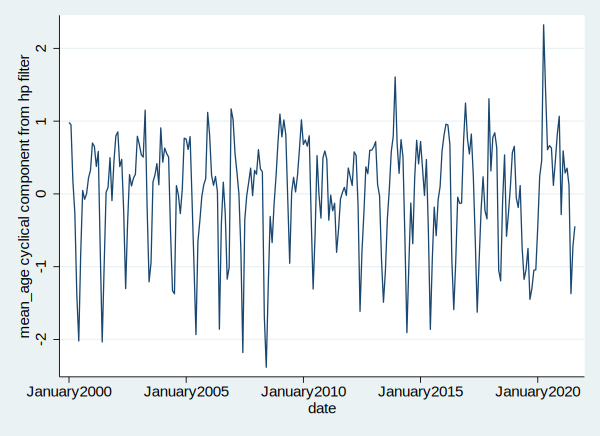

In [105]:
twoway (line ct date if emp2 == 2)

In [126]:
gen tmp_var = count_in * mean_age
bysort date: egen total_in = total(count_in)
bysort date: egen total_age = total(tmp_var)
gen mean_age_t = total_age / total_in

drop tmp_var total_in total_age

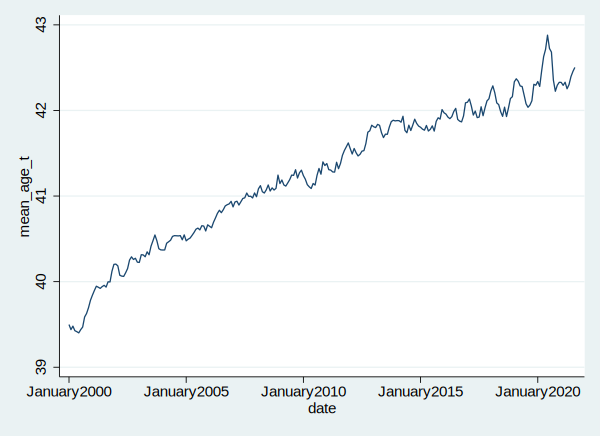

In [127]:
twoway (line mean_age_t date)

In [128]:
gen age_diff = mean_age - mean_age_t

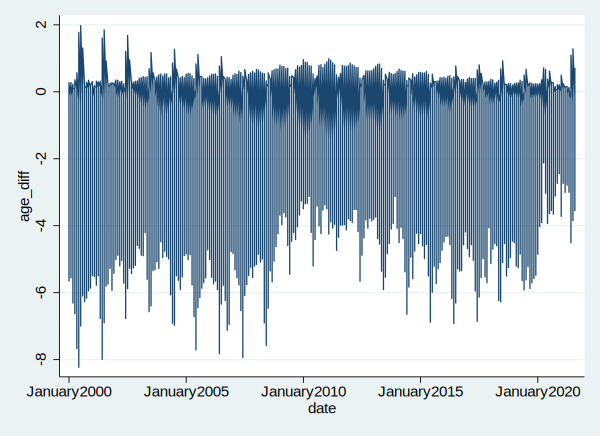

In [129]:
twoway (line age_diff date)

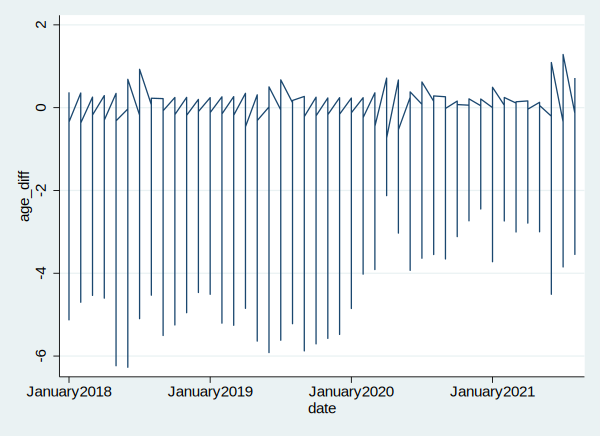

In [130]:
twoway (line age_diff date if year >= 2018)

In [ ]:
Effect is